<a href="https://colab.research.google.com/github/aaronhowellai/machine-learning-projects/blob/main/1_Week_Handwritten_Digits_Classification%2C_MNIST_Dataset%2C_ML%2C_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1-Week Machine Learning Project for Handwritten Digits Classification** using Scikit-learn

An End-to-end Machine Learning Project based on a code-along example project outlined in **Chapter 3** of **"Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow" by Aurélien Géron.**


*The project outline in the book encourages the reader to engage with the sample project in such a way that you conduct your own investigation as well as following the example and understand the results yourself to form individual reflections and conclusions. This notebook is the result of that process.*

### **MNIST dataset containing 70,000 small images of handwritten digits**

Using the famous MNIST dataset containing 70,000 small images of handwritten digits, with the guidance of Chapter 3 "Classification" in Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow by Aurélien Géron, I applied techniques and methods such as Multi-class Classification, Binary Classification, Precision/Recall (F1 Score), Cross Validation, Random Forest Classification and more.



---



# **Contents** <a name="contents"></a>

*(Click to be directed to listed content in notebook)*

1. [**Problem Definition**](#problem-definition)
2. [**Project Setup**](#project-setup)
3. [**Exploratory Data Analysis**](#eda)
4. [**Data Cleaning**](#data-cleaning)
5. [**Binary Classification**](#binary-classification)
6. [**Multiclass Classification**](#multiclass-classification)
7. [**Project Conclusion**](#conclusion)



---



# **Project Setup** <a name="project-setup"></a>
* Importing Packages
* Defining Utilities
* Download the Data

## **Importing Packages**

In [1]:
# import packages necessary for project
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyArrowPatch
import numpy as np
import seaborn as sns
import pandas as pd
import sys
import os
from pathlib import Path
from scipy.ndimage import shift
# extras
import tarfile
import urllib.request

# machine learning packages
import sklearn
# settings
from packaging import version
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
# models, model operations, hyperparameter optimization
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
# checks, inspection, metrics, estimators
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# dataset, data treatments
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
# imputation
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
# // preprocessing
# encoders
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# scalers
from sklearn.preprocessing import StandardScaler
# pipeline operations
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# error predictions

## **Defining Utilities** <a name="utilities"></a>

In [2]:
# (1) plot image data
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')

# +--------------------------------------------------------------------------------------------------------------------------------------+

# (2) plotting settings
plt.rc('font',size=14)
plt.rc('axes',labelsize=14, titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

# +--------------------------------------------------------------------------------------------------------------------------------------+

# (3) enable dark mode for plots
plt.style.use('dark_background')

# +--------------------------------------------------------------------------------------------------------------------------------------+

# (4) set random seed value
np.random.seed(42)
random_state_val = 42

# +--------------------------------------------------------------------------------------------------------------------------------------+

# (5) set test_size value
test_size_val = .2

# +--------------------------------------------------------------------------------------------------------------------------------------+

# (6) custom cross-validation estimator with stratifiedKfold (for bespoke control)
class StratifiedKFoldCV(BaseEstimator, ClassifierMixin):
  def __init__(self,
               base_estimator,
               n_splits=3,
               random_state=None,
               shuffle=False
               ):
    self.base_estimator = base_estimator
    self.n_splits = n_splits
    self.random_state = random_state
    self.shuffle = shuffle
    self.scores_ = []

  def fit(self, X, y):
    skf = StratifiedKFold(
        n_splits=self.n_splits,
        random_state=self.random_state,
        shuffle=self.shuffle
    )
    self.scores_ = []

    for train_index, test_index in skf.split(X, y):
      X_train, y_train = X[train_index], y[train_index]
      X_test, y_test = X[test_index], y[test_index]

      clf = clone(self.base_estimator)
      clf.fit(X_train, y_train)
      score = clf.score(X_test, y_test) # accuracy
      self.scores_.append(score)

    return self

  def predict(self, X):
    raise NotImplementedError("This estimator is for cross-validation only.")

  def score(self, X=None, y=None):
    return np.mean(self.scores_)

# **Exploratory Data Analysis** <a name="eda"></a>
[Scroll back to contents ↑](#contents)

## **Download the Data**

In [3]:
# download the data
mnist = fetch_openml('mnist_784',as_frame=False) # set numpy arrays as default

## **Observe the condition of the data**

In [4]:
# describe
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
# set data and target
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
# array size
X.shape

(70000, 784)

In [7]:
# observe y
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
# y array size
y.shape

(70000,)

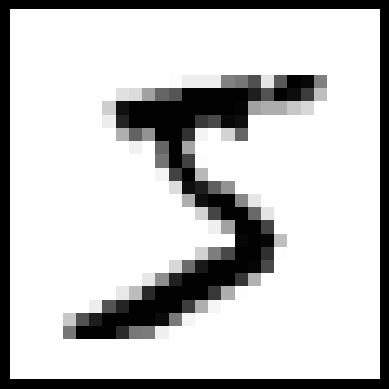

In [9]:
# view a digit instance
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [10]:
# view the label for this instance
y[0]

'5'

In [11]:
# define the train-test split (the first 60,000 images are already defined as the training set and pre-shuffled)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

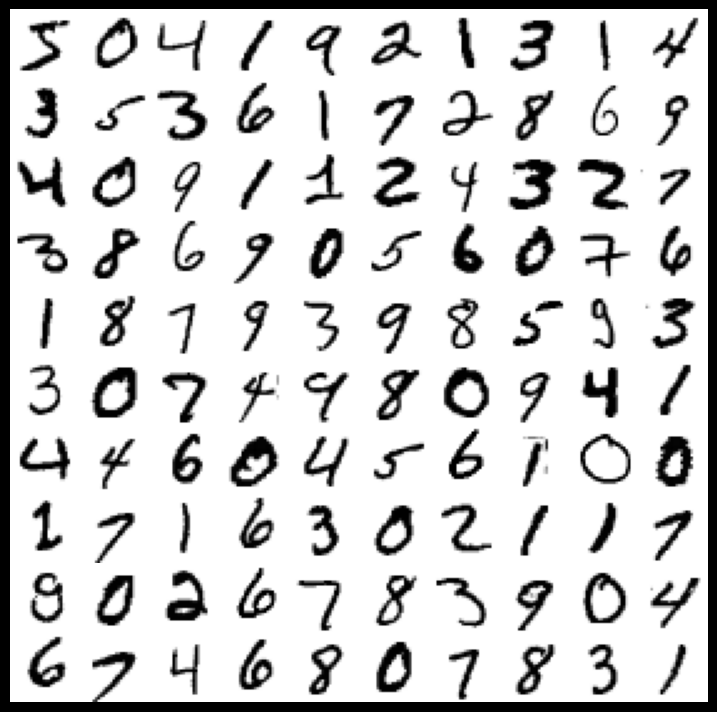

In [12]:
# digits from the MNIST dataset
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
  plt.subplot(10,10, idx + 1)
  plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

# **Binary Classification** <a name="binary-classification"></a>
[Scroll back to contents ↑](#contents)

## **Training a Binary Classifier**
To start simply, the model will only be trained to detect the digit of 5.

In [13]:
# 5 detector (2 classes: 5 and not 5)
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

## **Stochastic Gradient Descent Classifier** (Early Benchmark)
This Binary Classifier is capable of handling very large datasets efficiently, in part because SGD deals with training instances independently, one at a time, making it suitable also for *online learning*.

In [14]:
# initialize predictor
sgd_clf = SGDClassifier(random_state=random_state_val)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
# run prediction
sgd_clf.predict([some_digit])

array([ True])

### **Performance Measures**: *with k-fold Cross-Validation*

In [16]:
# evaluate performance measures
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### **Misrepresentative Results**
Because it is **unlikely** that the model has achieved 95%+ accuracy accross all cross-validation folds, I can investigate this result with a dummy classifier and reveal whether accuracy as a performance measure is appopriate for classification tasks.  

In [17]:
# use a dummy classifier: that classifies every single image in the most frequent class (in this case: non-5)
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


*( no 5s are detected )*

### **Re-evaluate Performance**
Below shows like in the example in the [*book*](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/), that accuracy is measured on the fact that only around 10% of the sample data images are 5s, so statistically speaking, the model will predict correctly or 90% of cases.

In [18]:
# cross-validation with dummy classifier
cross_val_score(
    dummy_clf,
    X_train,
    y_train_5,
    cv=3,
    scoring="accuracy"
    )

array([0.90965, 0.90965, 0.90965])

This result demonstrates why ***accuracy is generally not the preferred performance measure for classifiers***, especially when dealing with skewed datasets (when some classes are far more represented than others).

### **Implementing Cross-Validation Manually**
Occassionally, it is necessary to to gain more control over the cross-validation than the standard solution from frameworks - Scikit-Learn in this case.

This refers to the user-defined estimator class object defined as utility no. "6" in the ["Defining Utilities"](#utilities) section.

In [19]:
# manual cross-validation estimator
splits = 3
evaluator = StratifiedKFoldCV(SGDClassifier(random_state=random_state_val), n_splits=splits)
evaluator.fit(X_train, y_train_5)
print("Fold Scores:", evaluator.scores_)
print("Mean accuracy:", evaluator.score())

Fold Scores: [0.95035, 0.96035, 0.9604]
Mean accuracy: 0.9570333333333334


### **Implementing a Confusion Matrix**
A much better way to evaluate the performance of a classifier is to use a ***confusion matrix***.

In [20]:
# initialize confusion matrix
y_train_pred = cross_val_predict(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3
    )
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

The results show that in the top left-hand corner, **53892** instances were **correctly classified as non-5**s (true negative class), and in the bottom right-hand corner, **3530** instances were **classified correctly as positives** (true positives).

However in the bottom-left, **1891** instances were classified **as false negatives** (incorrectly predicted as non-5s), while the last **687** instances were **incorrectly** concluded as **false positives.**

In [21]:
# perfect classification example
y_train_perfect_predictions = y_train_5
cm2 = confusion_matrix(y_train_5, y_train_perfect_predictions)
cm2

array([[54579,     0],
       [    0,  5421]])

In [22]:
# all training instances
print(sum(cm2.ravel())==60000)

True


### **Precision & Recall**
(Classifier Metrics)

In [23]:
# precision ----------------------------------------------------------------------------+

> *Precision =* $\frac{TP}{TP+FP}$

*(Accuracy of positive predictions)*





*This is what is computed below with `precision_score()`*
### $\frac{3530}{(3530 + 687)} ↓$


In [24]:
# precision score
precision = precision_score(y_train_5, y_train_pred)
print("Precision Score:",round(precision,3))

Precision Score: 0.837


In [25]:
# manual precision score
manual_precision = cm[1,1] / (cm[0,1] + cm[1,1])
print("Manual Precision Score:",round(manual_precision,3))

Manual Precision Score: 0.837


In [26]:
# recall --------------------------------------------------------------------------------+

> *Recall =* $\frac{TP}{TP+FN}$

*(Metric: Sensitivity, True Positive Rate)*





*This is what is computed below with `recall_score()`*
### $\frac{3530}{(3530 + 1891)} ↓$

In [27]:
# recall score
recall = recall_score(y_train_5, y_train_pred)
print("Recall Score:",round(recall,3))

Recall Score: 0.651


In [28]:
# manual recall score
manual_recall = cm[1,1] / (cm[1,0] + cm[1,1])
print("Manual Recall Score:",round(manual_recall,3))

Manual Recall Score: 0.651


#### **Summary of Precision & Recall**
* When the classifier claims an image instance represents a 5, it is correct 83.7% off the time, and only detects 65.1% of the 5s in the entire sample.

### **F1 Score**
(Harmonic mean of precision & recall)

### $F_1 = \frac{2}{\frac{1}{\text{precision}}+\frac{1}{\text{recall}}} = 2 × \frac{\text{precision} \space × \space \text{recall}}{\text{precision}\space+\space \text{recall}} = \frac{TP}{TP \space + \space \frac{FN \space + \space FP}{2}}$

In [29]:
# implement f1 score
f1 = f1_score(y_train_5, y_train_pred)
print("F1 score:",round(f1,3))

F1 score: 0.733


In [30]:
# manual f1 score
manual_f1 = cm[1,1] / (cm[1,1] + (cm[1,0] + cm[0,1]) / 2)
print("Manual F1 score:",round(manual_f1,3))

Manual F1 score: 0.733


### **Precision/Recall Trade-off**

In [31]:
# decision threshold
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [32]:
# zero threshod: where the classifier detects 5s
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [33]:
# raising the threshold (decreases recall)
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [34]:
# deciding what threshold to use, using cross validation
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

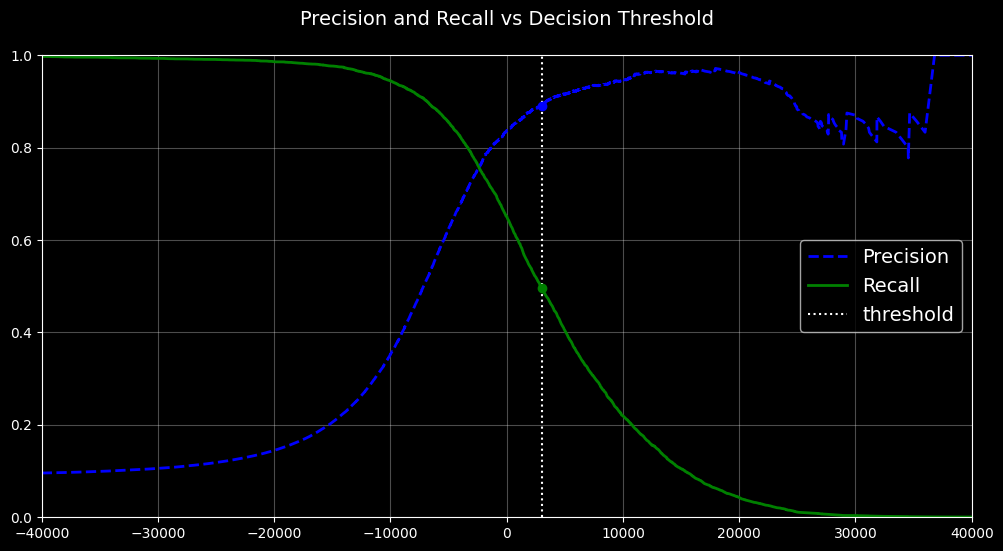

In [35]:
# plot the precision and recall as functions of the threshold value
plt.figure(figsize=(12, 6))
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "white", "dotted", label="threshold")

threshold_index = np.argmin(np.abs(thresholds - threshold))
plt.plot(threshold, precisions[threshold_index], "bo")
plt.plot(threshold, recalls[threshold_index], "go")

plt.title("Precision and Recall vs Decision Threshold\n")
plt.grid(alpha=.3)
plt.legend(loc='center right')
plt.xlim([-40000,40000])
plt.ylim([0.0,1.0])
plt.show()

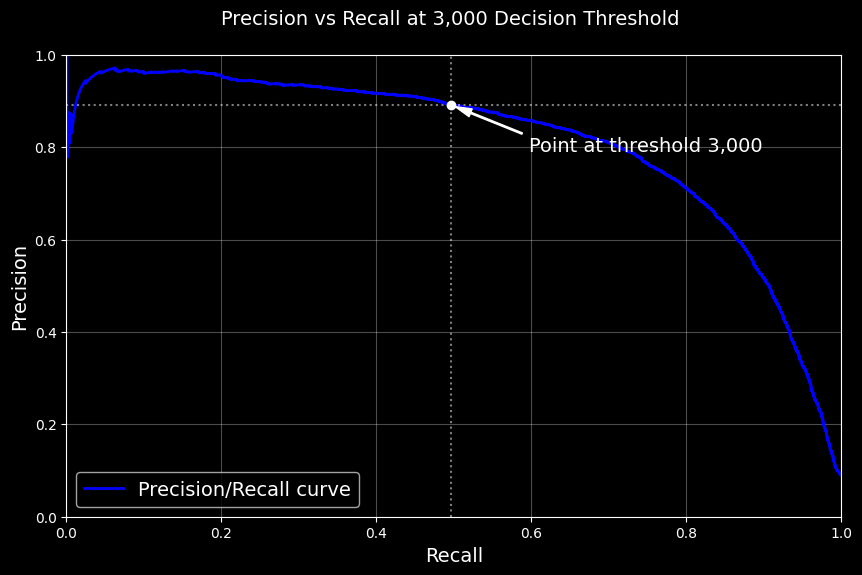

In [36]:
# plotting directly against recall to examine point of diminishing returns past threshold=3000
plt.figure(figsize=(10, 6))
plt.plot(recalls, precisions, "b-", linewidth=2, label="Precision/Recall curve")

threshold_index = np.argmin(np.abs(thresholds - threshold))

# get precision and recall at that index
prec_at_threshold = precisions[threshold_index]
recall_at_threshold = recalls[threshold_index]

# add horizontal & vertical dotted lines
plt.axhline(y=prec_at_threshold, color="white", linestyle="dotted", label=None, alpha=.5)
plt.axvline(x=recall_at_threshold, color="white", linestyle="dotted", label=None, alpha=.5)

# add convergence dot
plt.plot(recall_at_threshold, prec_at_threshold, "wo")  # white circle

# annotate the dot
plt.annotate(
    "Point at threshold 3,000",
    xy=(recall_at_threshold, prec_at_threshold),
    xytext=(recall_at_threshold + 0.1, prec_at_threshold - 0.1),
    arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=6),
    color="white"
)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.grid(alpha=.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc = "lower left")
plt.title("Precision vs Recall at 3,000 Decision Threshold \n")
plt.show()

* *↑ Precision drops dramatically at 80% recall and seems to hit a point of diminishing returns in terms of trade-off at 60% recall*

In [37]:
# finding the lowest threshold for 90% precision
idx_for_90_prec = (precisions >= .9).argmax()
threshold_for_90_prec = float(thresholds[idx_for_90_prec])
threshold_for_90_prec


3370.0194991439557

In [38]:
# evaluate predictions using this threshold
y_train_pred_90 = (y_scores >= threshold_for_90_prec)

# checking the scores
print(f"Precision: {precision_score(y_train_5, y_train_pred_90):.2f}")
print(f"Recall: {recall_score(y_train_5, y_train_pred_90):.2f}")

Precision: 0.90
Recall: 0.48


### **ROC Curve**

Receiver operating characteristic curve: another common tool used with binary classifiers. In contrast to the Precision/recall curve, the ROC curve plots the *True Positive Rate* (recall) against the *False Positive Rate* (FPR), also known as Fall-out: the ratio of negative instances that are incorrectly classified as positive.

### $\text{FPR} = 1 - \text{TNR}$

TNR = True Negative Rate, *Specificity*

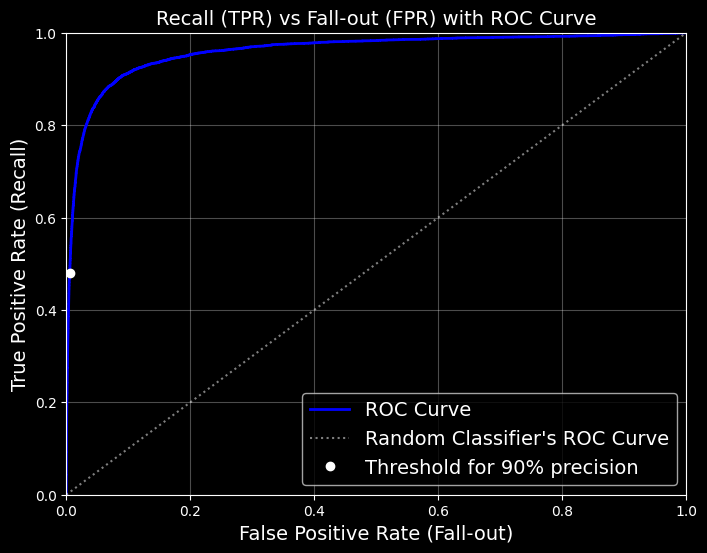

In [39]:
# roc curve: plotting TPR against FPR
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

plt.figure(figsize=(8,6))
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_prec).argmax()
tpr_90,fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr,tpr, "b-", linewidth=2, label="ROC Curve")
plt.plot([0,1], [0,1], "w:", alpha=.5, label="Random Classifier's ROC Curve")
plt.plot([fpr_90],[tpr_90], "wo", label="Threshold for 90% precision")

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel("True Positive Rate (Recall)")
plt.xlabel("False Positive Rate (Fall-out)")
plt.grid(alpha=.3)
plt.legend(loc="lower right")
plt.title("Recall (TPR) vs Fall-out (FPR) with ROC Curve")
plt.show()

* *↑ As seen above, there is a trade-off associated with the increase of the True Positive Rate (recall), where Fall-out gets signifcantly worse past an 80% Recall, where it appears to range between 3-5%. The Random Classifier's linear vector demonstrates no proportional adjustment to adjust for trade-off, which is not good.*

In [40]:
# comparing classifiers with auc (area under curve) score, with the auc ideality score being equal to 1.0
print(f"ROC Area Under Curve Score: {float(roc_auc_score(y_train_5, y_scores)):.2f}")

ROC Area Under Curve Score: 0.96


*Note to self:*

### **When to use the ROC Curve vs Precision-Recall Curve**

* When the positive class is rare or the false positives are more important than false negatives, the **Precision Recall curve** is preferable to plot for the performance measure, otherwise the **ROC curve** is preferable.

-------

* For Tumor classification, because the positive class is rare it is better to use the **Precision-recall curve** to avoid misdiagnosis. According to ChatGPT "*It's more informative about real-world performance when false negatives are dangerous and positives are rare.*" This is with the caveat that context needs to be added to get information on True Negatives which are really important also, which can be done with a Confusion Matrix, F1 Scores and ROC AUC Score.

-------

* In this case, the ROC Curve presented the clasifier in a far more favourable fashion than the PR Curve, because the are few positives of the 5 class compared to the negatives. The PR curve class's area could be far closer to the right of the graph, nearing an AUC closer to 1.0.

## **Using a `RandomForestClassifier` to compare its PR Curve and F1 Score to the `SGDClassifier`**

In [41]:
# random forest classifier
forest_clf = RandomForestClassifier(random_state=random_state_val)

# train the rf classifier model and assign scores to each instance using "predict_proba" as its decision function
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

* *The caveat here is that these are estimated probabilities in a portion of the dataset where 94% of instances are positive.*

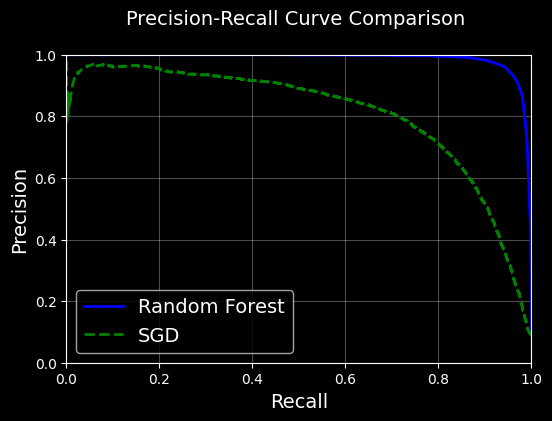

In [42]:
# precision x recall curve function with positive class
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest
)

# plot the pr curve
plt.figure(figsize=(6,4))
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "g--", linewidth=2, label="SGD")

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.grid(alpha=.3)
plt.legend(loc="lower left")
plt.title("Precision-Recall Curve Comparison \n")
plt.show()

* *The Precision-Recall curve on the `RandomForestClassifier` is clearly superior to the `SGDClassifier`, as seen in the graph, as the area under the curve nears much closer to 1.0.*

In [43]:
# measuring the performance of the random forest classifier numerically
y_train_pred_forest = y_probas_forest[:,1] >= 0.5 # positive probability more than or equal to 50%
print(f"F1 Score: {f1_score(y_train_5, y_train_pred_forest):.3f}")
print(f"ROC AUC Score: {roc_auc_score(y_train_5, y_scores_forest):.3f}")
print(f"Precision Score: {precision_score(y_train_5, y_train_pred_forest):.3f}")
print(f"Recall Score: {recall_score(y_train_5, y_train_pred_forest):.3f}")

F1 Score: 0.927
ROC AUC Score: 0.998
Precision Score: 0.990
Recall Score: 0.873


### **Conclusion**: Random Forest vs SGD Classifier for 5's
* *With a satisfactory set of results of **99% Precision, 87% Recall**, and strong scores on the F1 and ROC AUC scores, the experiment to compare methods in Binary Classification can be concluded now that I have explored and applied the concepts below successfully:*

1. Binary Classification Model Selection
2. Binary Classification Training
3. Selecting Appropriate Performance Measures
4. Evaluation using Cross-Validation
5. Precision-Recall Trade-offs
6. Comparative Peformance Measures between Classifier Models

# **Multilabel Classification** <a name="multiclass-classification"></a>
[Scroll back to contents ↑](#contents)
* Now that I have experimented with Binary Classifiers for just identifying 5's, I want to look at outputting multiple classes with a few different models to compare performance.
* Because I will be looking at outputting multiple binary tags, it will be classed as "Multilabel Classification".

## **Experiment with** `KNeighboursClassifier`
* The code below creates a `y_multilabel` array containing two target labels for each digit image.
1. The first indiates whether or not the digit is large (7,8,9)
2. The second indicates whether the image is odd or even
* Then creates a KNeighboursClassifier instance
* Finally, fits the model instance using the multiple targets array.

In [46]:
# example with kneighbours classifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [47]:
# make predictions
knn_clf.predict([some_digit])

array([[False,  True]])

* 5' or `some_digit` is not large, but is odd, which is correct.

In [48]:
# computing the average f1 score across all labels
y_train_knn_pred = cross_val_predict(knn_clf,
                                     X_train,
                                     y_multilabel,
                                     cv=3,
                                     )
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.9764102655606048

## **Weighted Label F1 Score vs Unweighted**
* This approach assumes that all labels are equally important.
* The code below shows each label with adjusted weights equal to its *support:* the number of instances with that target label.

In [52]:
# weighted labels equal to its support vs unweighted
f1_weighted = f1_score(y_multilabel, y_train_knn_pred, average='weighted')
f1_averaged = f1_score(y_multilabel, y_train_knn_pred, average='macro')

print(
    f"Weighted F1 Score: {f1_weighted:.3f}\n"
    f"Averaged F1 Score: {f1_averaged:.3f}"
)

Weighted F1 Score: 0.978
Averaged F1 Score: 0.976


* The weighted F1 Score shows marginally better performance

## **Chain Classifiers:** For Models Without Native Multilabel Support
* When a model makes a prediction, it uses the input features plus all the predictions of the models that comf before it in the chain.

In [53]:
# chain classifier using the cross-validation strategy with the first 2000 images of the MNIST Dataset
chain_clf = ClassifierChain(
    SVC(),
    cv=3,
    random_state=random_state_val
)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

# make predictions
chain_clf.predict([some_digit])

array([[0., 1.]])

* The results are the One-hot encoded version of the Multilabel Classifier

# **Multioutput Classification**
* Often called Multiclass Classification, each output can have more than 2 possible values.
* To explore the concept, below build a system that removes noise from images. It will take a noisy image as input and aim to output a clean digit image, represented as an array of pixel intensities like the MNIST images.
* The classifiers output will be multilabel (one label per pixel) and each label can have pixel range values from 0 to 255.

In [69]:
# create training and test sets by taking the MNIST images and adding noise to their pixel intensities with random numbers, with the target being the original images
np.random.seed(random_state_val)
noise1 = np.random.randint(0, 100, (len(X_train), 784))
noise2 = np.random.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise1
X_test_mod = X_test + noise2
y_train_mod = X_train
y_test_mod = X_test

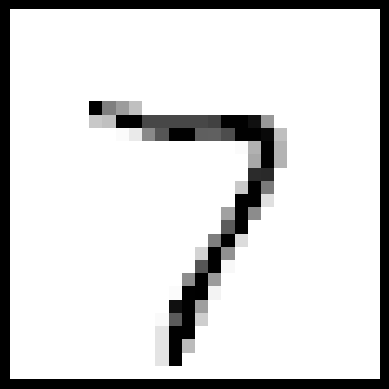

In [70]:
# train a classifier to denoise image
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]]) # first image
plot_digit(clean_digit)
plt.show()

* The noise has been successfully removed and displays digit 7

# **KNeighbours Classifier with 97%+ Accuracy On Test Set**

In [72]:
knn = _clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688

In [75]:
# tune hyperparameters, training on first 10,000 images
param_grid = [
    {'weights':["uniform", "distance"], "n_neighbors": [3,4,5,6]}
]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(
    knn_clf, param_grid, cv=5
)
grid_search.fit(
    X_train[:10_000],
    y_train[:10_000]
)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [76]:
# view the best hyperparameters
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [79]:
# view accuracy score
prev_score = baseline_accuracy
current_score = grid_search.best_score_

print(
    f"Previous Accuracy Score: {prev_score:.3f}\n"
    f"Current Accuracy Score: {current_score:.3f}"
)

Previous Accuracy Score: 0.969
Current Accuracy Score: 0.944


In [81]:
# difference in accuracy
delta = abs(current_score - prev_score)
delta.round(3)

np.float64(0.025)

* Performance drops by 2.5% because of the training occuring on only the first 10,000 images

In [82]:
# train again on the full training set
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)

In [97]:
print(
    f"Baseline Accuracy Score: {prev_score:.3f}\n"
    f"Hyperparameter Tuned Accuracy Score on Test Set: {tuned_accuracy:.3f}\n"
    f"Absolute Percentage Difference: {(abs(prev_score-tuned_accuracy))*1000:.1f}%!")

Baseline Accuracy Score: 0.969
Hyperparameter Tuned Accuracy Score on Test Set: 0.971
Absolute Percentage Difference: 2.6%!


* There was a 2.6% increase in accuracy from the baseline!

# **Project Conclusion** <a name="conclusion"></a>
[Scroll back to contents ↑](#contents)
* Completed Exploratory Data Analysis on the MNIST dataset
* Explored how to select good performance metrics for classification tasks
* Learned how to select the appropriate precision/recall trade-off
* Compared different classifiers such as the SGDClassifier, SVC and KNeighbors models
* Explored methods of evaluating results with Binary, Multilabel and Multiclass classifiers
* Built classification systems for a variety of tasks such as image denoising, and True/False label comparisons.